In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train.csv',index_col='PassengerId')

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import seaborn as sns

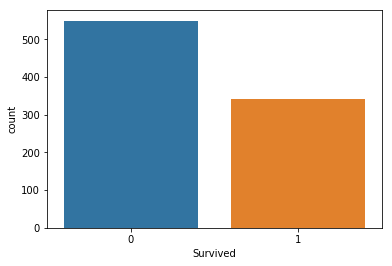

In [7]:
sns.countplot(x='Survived',data=df)
plt.show()

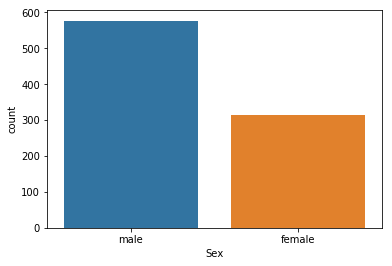

In [9]:
sns.countplot(x='Sex',data=df)
plt.show()

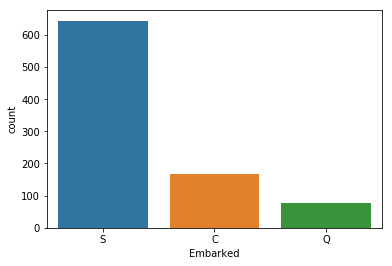

In [10]:
sns.countplot(x='Embarked',data=df)
plt.show()

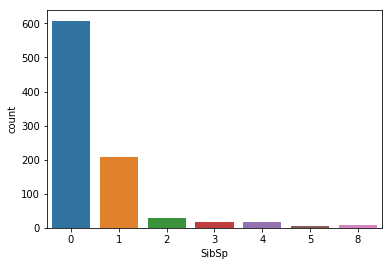

In [11]:
sns.countplot(x='SibSp',data=df)
plt.show()

In [18]:
cols =['Survived','Pclass','Sex','Age']
df2 = df[cols].copy()
df2

,Survived,Pclass,Sex,Age
PassengerId,,,,
1,0,3,male,22.0
2,1,1,female,38.0
3,1,3,female,26.0
4,1,1,female,35.0
5,0,3,male,35.0
6,0,3,male,NaN
7,0,1,male,54.0
8,0,3,male,2.0
9,1,3,female,27.0


## cleaning data for Machine learning prediction algo

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 34.8+ KB


In [29]:
df2.Age.replace(np.nan,df2.Age.mean(),inplace=True)
df2.Age = df2.Age.astype('int64')

In [31]:
df2['Sex'].unique()

array(['male', 'female'], dtype=object)

In [32]:
df2.Sex.replace('male',0,inplace=True)
df2.Sex.replace('female',1,inplace=True)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
dtypes: int64(4)
memory usage: 34.8 KB


## implement simplest machine learning magic

In [34]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR

In [49]:
df2 = shuffle(df2)
train,test =train_test_split(df2)
features =['Pclass','Sex','Age']
output = 'Survived'

In [50]:
# ----------------- seperate the data --------------
train_input = df2[features]
test_input =  df2[features]
train_output = df2[output]
test_output =  df2[output]

In [82]:
knn = KNeighborsClassifier()
knn.fit(X=train_input,y=train_output)
knn.score(test_input,test_output)*100

82.60381593714928

In [83]:
rfc = RandomForestClassifier()
rfc.fit(X=train_input,y=train_output)
rfc.score(test_input,test_output)*100

87.09315375982042

In [84]:
abc = AdaBoostClassifier()
abc.fit(X=train_input,y=train_output)
abc.score(test_input,test_output)*100

80.24691358024691

In [85]:
abc = SVR()
abc.fit(X=train_input,y=train_output)
abc.score(test_input,test_output)*100

51.209165098465746

In [86]:
knn.predict([[1,0,35]])

array([1])

In [87]:
def predict_survival(pclass,gender,age,model):
    if gender.lower() == 'male':
        gender=0
    else:
        gender=1
    out =model.predict([[pclass,gender,age]])
    if out[0] == 0:
        return 'Not survived'
    else:
        return 'Survived'

In [88]:
predict_survival(pclass=3,gender='female',age=23,model=knn)

'Survived'

In [89]:
predict_survival(pclass=2,gender='male',age=50,model=knn)

'Survived'

<BarContainer object of 891 artists>

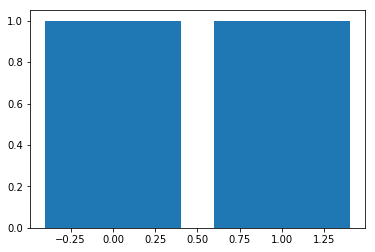

In [114]:
plt.bar(test_output,knn.predict(test_input))

In [105]:
abc.C

1.0